# AuNR DA Figure 1

In [39]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import pandas as pd
import matplotlib.pyplot as plt
import ast
from pathlib import Path

%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

## input data

In [40]:
# 052223 AuNR os glass relative P8 absolute P7
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")

fig1a_glass_data = pd.read_csv(Path(p_data, '052223_Zhenyang_exp_glass.csv'))
fig1a_glass_data['exp_ene'] = [ast.literal_eval(df) for df in fig1a_glass_data['exp_ene']]
fig1a_glass_data['exp_dfs'] = [ast.literal_eval(df) for df in fig1a_glass_data['exp_dfs']]
fig1a_glass_data['fitting'] = [ast.literal_eval(df) for df in fig1a_glass_data['fitting']]
print(fig1a_glass_data.shape)

# 091123 AuNR on ITO relative P5 absolute P4
fig1a_ito_data = pd.read_csv(Path(p_data, '091123_Zhenyang_exp_ito.csv'))
fig1a_ito_data['exp_ene'] = [ast.literal_eval(df) for df in fig1a_ito_data['exp_ene']]
fig1a_ito_data['exp_dfs'] = [ast.literal_eval(df) for df in fig1a_ito_data['exp_dfs']]
fig1a_ito_data['fitting'] = [ast.literal_eval(df) for df in fig1a_ito_data['fitting']]
print(fig1a_ito_data.shape)

fig1b_glass_data = pd.read_csv(Path(p_data, 'P001_rod_glass_W_30.46_L_89.69.txt'))
fig1b_glass_data['sim_ene'] = 1240 / fig1b_glass_data['wav']
fig1b_ito_data = pd.read_csv(Path(p_data, 'P003_rod_ito_W_28.61_L_88.77.txt'))
fig1b_ito_data['sim_ene'] = 1240 / fig1b_ito_data['wav']

(38, 11)
(62, 11)


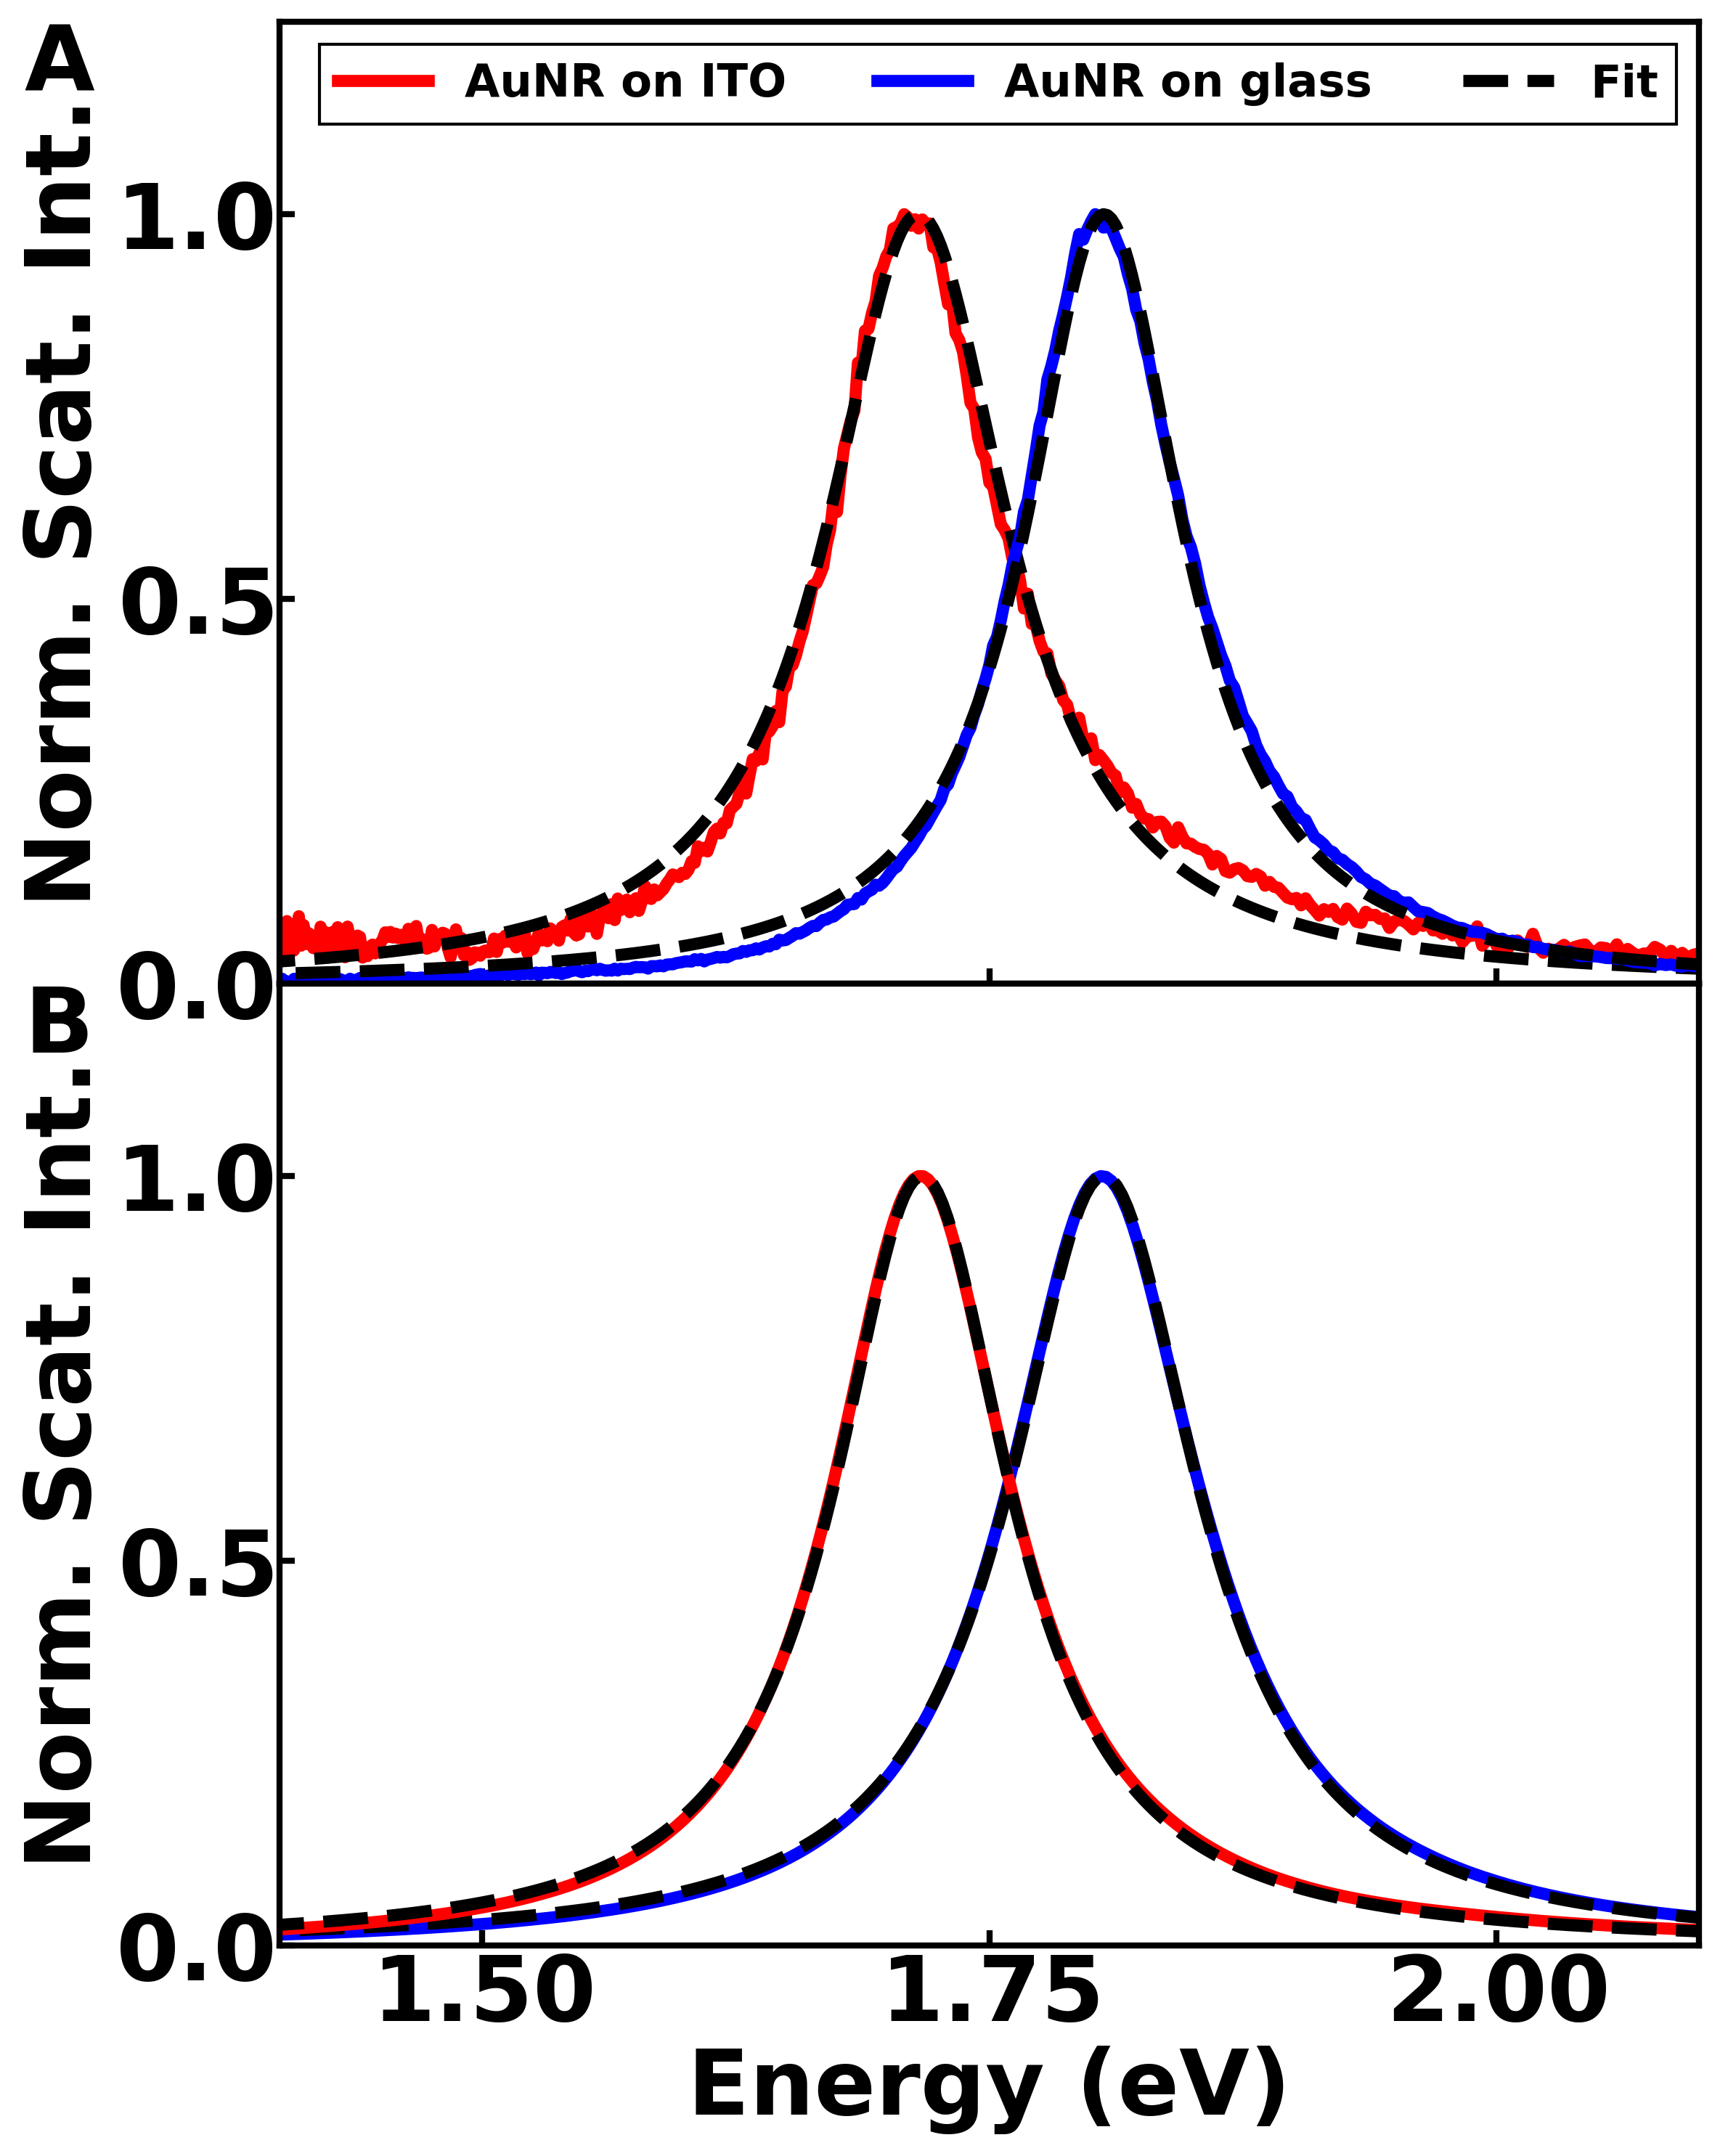

In [42]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 10), gridspec_kw={'hspace': 0}, dpi=300)

# Plot for AuNR on glass and AuNR on ITO (first figure)
part_num = 3
max_int_ito, eres_ito, linewidth_ito = Lorentzian.lorentzian(fig1a_ito_data['exp_ene'][part_num-1], fig1a_ito_data['exp_dfs'][part_num-1])
fitting_exp_ito = Lorentzian.func(fig1a_ito_data['exp_ene'][part_num-1], max_int_ito, eres_ito, linewidth_ito)

ax1.plot(fig1a_ito_data['exp_ene'][part_num-1], [i/max(fig1a_ito_data['exp_dfs'][part_num-1]) for i in fig1a_ito_data['exp_dfs'][part_num-1]], c='r', lw=4, label='AuNR on ITO')
ax1.plot(fig1a_ito_data['exp_ene'][part_num-1], [i/max(fitting_exp_ito) for i in fitting_exp_ito], c='k', lw=4, ls='--')

part_num = 1
max_int_glass, eres_glass, linewidth_glass = Lorentzian.lorentzian(fig1a_glass_data['exp_ene'][part_num-1], fig1a_glass_data['exp_dfs'][part_num-1])
fitting_exp_glass = Lorentzian.func(fig1a_glass_data['exp_ene'][part_num-1], max_int_glass, eres_glass, linewidth_glass)

ax1.plot(fig1a_glass_data['exp_ene'][part_num-1], [i/max(fig1a_glass_data['exp_dfs'][part_num-1]) for i in fig1a_glass_data['exp_dfs'][part_num-1]], c='b', lw=4, label='AuNR on glass')
ax1.plot(fig1a_glass_data['exp_ene'][part_num-1], [i/max(fitting_exp_glass) for i in fitting_exp_glass], c='k', lw=4, ls='--', label='Fit')

ax1.set_yticks([0.0, 0.5, 1.0])
ax1.tick_params(axis='y', labelsize=30, pad=2)
ax1.set_ylabel('Norm. Scat. Int.', fontsize=30)
ax1.set_xlim(1.4, 2.1)
ax1.set_ylim(0, 1.25)
ax1.text(-0.18, 1, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)
ax1.legend(loc='upper right', fontsize=15, ncol=3)

# Plot for simulated data (second figure)
max_int_glass, eres_glass, linewidth_glass = Lorentzian.lorentzian(fig1b_glass_data['sim_ene'], fig1b_glass_data['cscat'])
fitting_sim_glass = Lorentzian.func(fig1b_glass_data['sim_ene'], max_int_glass, eres_glass, linewidth_glass)

ax2.plot(fig1b_glass_data['sim_ene'], fig1b_glass_data['cscat']/max(fig1b_glass_data['cscat']), c='b', lw=4, label='AuNR on glass')
ax2.plot(fig1b_glass_data['sim_ene'], fitting_sim_glass/max(fitting_sim_glass), c='k', lw=4, ls='--')

max_int_ito, eres_ito, linewidth_ito = Lorentzian.lorentzian(fig1b_ito_data['sim_ene'], fig1b_ito_data['cscat'])
fitting_sim_ito = Lorentzian.func(fig1b_ito_data['sim_ene'], max_int_ito, eres_ito, linewidth_ito)

ax2.plot(fig1b_ito_data['sim_ene'], fig1b_ito_data['cscat']/max(fig1b_ito_data['cscat']), c='r', lw=4, label='AuNR on ITO')
ax2.plot(fig1b_ito_data['sim_ene'], fitting_sim_ito/max(fitting_sim_ito), c='k', lw=4, ls='--', label='Fit')

ax2.set_xticks([1.5, 1.75, 2.0])
ax2.set_yticks([0.0, 0.5, 1.0])
ax2.tick_params(axis='both', labelsize=30, pad=2)
ax2.set_xlabel('Energy (eV)', fontsize=30)
ax2.set_ylabel('Norm. Scat. Int.', fontsize=30)
ax2.set_xlim(1.4, 2.1)
ax2.set_ylim(0, 1.25)
ax2.text(-0.18, 1, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots
plt.tight_layout()